# Using `pyND.gbt`

Introduction here

In [1]:
# Typical imports here
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c

In [2]:
from pyND.gbt import GBTspec

## Loading GBT spectra from GBTIDL ASCII output

In [3]:
input_filename = 'data/RBS2055_GBT.dat'
x = GBTspec.from_ascii(input_filename)

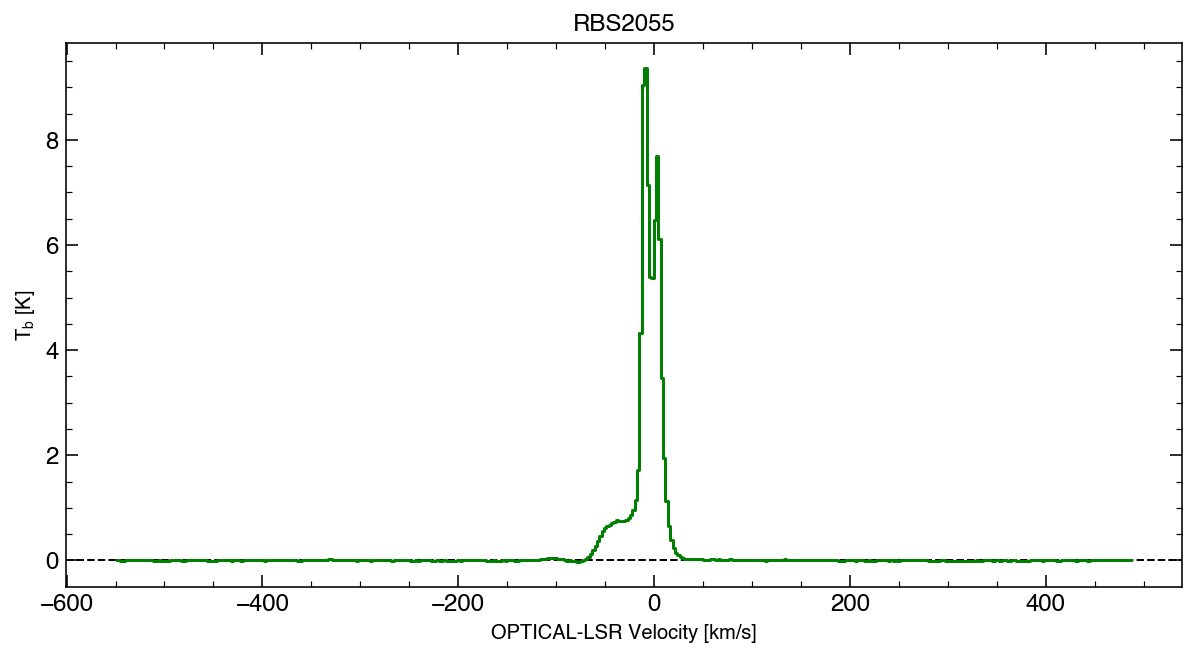

In [4]:
x.plotspectrum()

In [6]:
x.object,x.RA,x.DEC

('RBS2055', 357.9699958333333, 26.325738333333334)

## Loading GBT spectra from GBTIDL FITS format

Loading from a GBT FITS file requires an object name.

In [8]:
input_filename = 'data/AMIGA-GBT.fits'
object_name = 'RBS2055'
y = GBTspec.from_GBTIDL(input_filename,object_name)

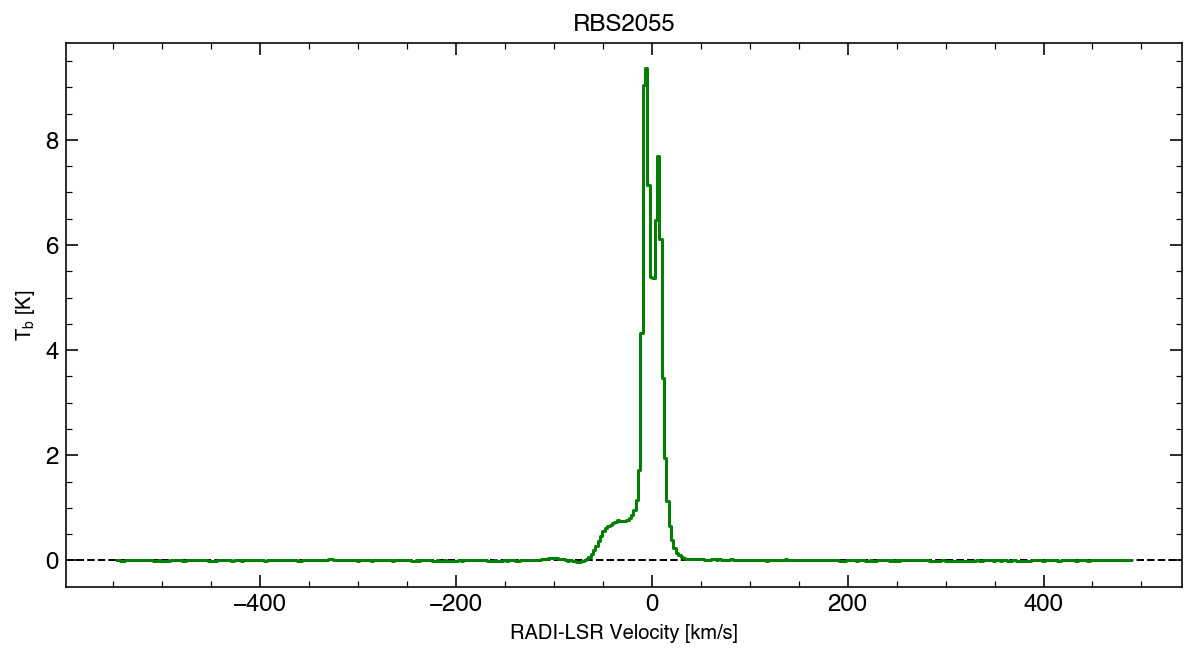

In [9]:
y.plotspectrum()

In [10]:
y.object,y.RA,y.DEC

('RBS2055', 357.969875, 26.32571666666667)

In [11]:
y.velocity[0:5]

<Quantity [-546.81276675, -544.39736376, -541.98196078, -539.56655779,
           -537.15115481] km / s>

In [12]:
y.Tb[0:5]

array([ 4.2841667e-03,  2.7083484e-03, -3.6905368e-03, -5.3097992e-03,
        6.5132595e-06], dtype=float32)

## Compare the two results

In this example, the results are slightly different, as the ASCII data are saved in the OPTICAL-LSR frame, while the GBTIDL data are saved using the RADI-LSR, the radio astronomical definition of the LSR.

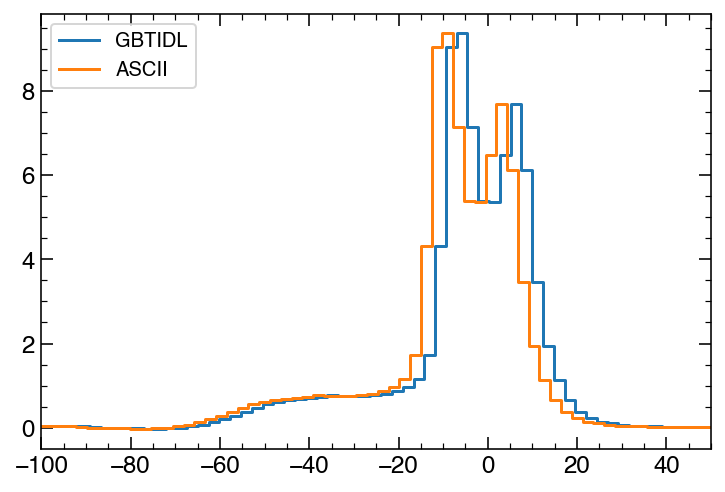

In [16]:
plt.plot(y.velocity,y.Tb,drawstyle='steps-mid',label='GBTIDL')
plt.plot(x.velocity,x.Tb,drawstyle='steps-mid',label='ASCII')
plt.xlim(-100,50)
plt.legend(loc='upper left')